# Avocado Data Analysis

## Business Understanding

The aim of this project is to answer the following four questions:
   - 1. Which region are the lowest and highest prices of Avocado?
   - 2. What is the highest region of avocado production?
   - 3. What is the average avocado prices in each year?
   - 4. What is the average avocado volume in each year?

# Data Understanding

The [Avocado dataset](https://www.kaggle.com/neuromusic/avocado-prices) was been used in this project.

This dataset contains 13 columns:
  1. Date - The date of the observation
  2. AveragePrice: the average price of a single avocado
  3. Total Volume: Total number of avocados sold
  4. Total Bags: Total number  o bags
  5. Small Bags: Total number of Small bags
  6. Large Bags: Total number of Large bags
  7. XLarge Bags: Total number of XLarge bags
  8. type: conventional or organic
  9. year: the year
  10. region: the city or region of the observation
  11. 4046: Total number of avocados with PLU 4046 sold
  12. 4225: Total number of avocados with PLU 4225 sold
  13. 4770: Total number of avocados with PLU 4770 sold

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

## 1. Data Preparation

In [ ]:
df = pd.read_csv('avocado.csv')
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [ ]:
df.isnull().sum()

,0
Unnamed: 0,0
Date,0
AveragePrice,0
Total Volume,0
4046,0
4225,0
4770,0
Total Bags,0
Small Bags,0
Large Bags,0


In [ ]:
df.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [ ]:
# Drop unnecessary columns
df = df.drop(['Unnamed: 0','4046','4225','4770','Date'],axis=1)

In [ ]:
df.head()

,AveragePrice,Total Volume,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,1.33,64236.62,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1.35,54876.98,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,0.93,118220.22,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,1.08,78992.15,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,1.28,51039.60,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [ ]:
def get_avarage(df,column):
    """
    Description: This function to return the average value of the column

    Arguments:
        df: the DataFrame.
        column: the selected column.
    Returns:
        column's average
    """
    return sum(df[column])/len(df)

def get_avarge_between_two_columns(df,column1,column2):
    """
    Description: This function calculate the average between two columns in the dataset

    Arguments:
        df: the DataFrame.
        column1:the first column.
        column2:the scond column.
    Returns:
        Sorted data for relation between column1 and column2
    """

    List=list(df[column1].unique())
    average=[]

    for i in List:
        x=df[df[column1]==i]
        column1_average= get_avarage(x,column2)
        average.append(column1_average)

    df_column1_column2=pd.DataFrame({'column1':List,'column2':average})
    column1_column2_sorted_index=df_column1_column2.column2.sort_values(ascending=False).index.values
    column1_column2_sorted_data=df_column1_column2.reindex(column1_column2_sorted_index)

    return column1_column2_sorted_data

In [ ]:
def plot(data,xlabel,ylabel):
    """
    Description: This function to draw a barplot

    Arguments:
        data: the DataFrame.
        xlabel: the label of the first column.
        ylabel: the label of the second column.
    Returns:
        None
    """

    plt.figure(figsize=(15,5))
    ax=sns.barplot(x=data.column1,y=data.column2,palette='rocket')
    plt.xticks(rotation=90)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(('Avarage '+ylabel+' of Avocado According to '+xlabel));

<ipython-input-10-ea6189be2f73>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(x=data.column1,y=data.column2,palette='rocket')


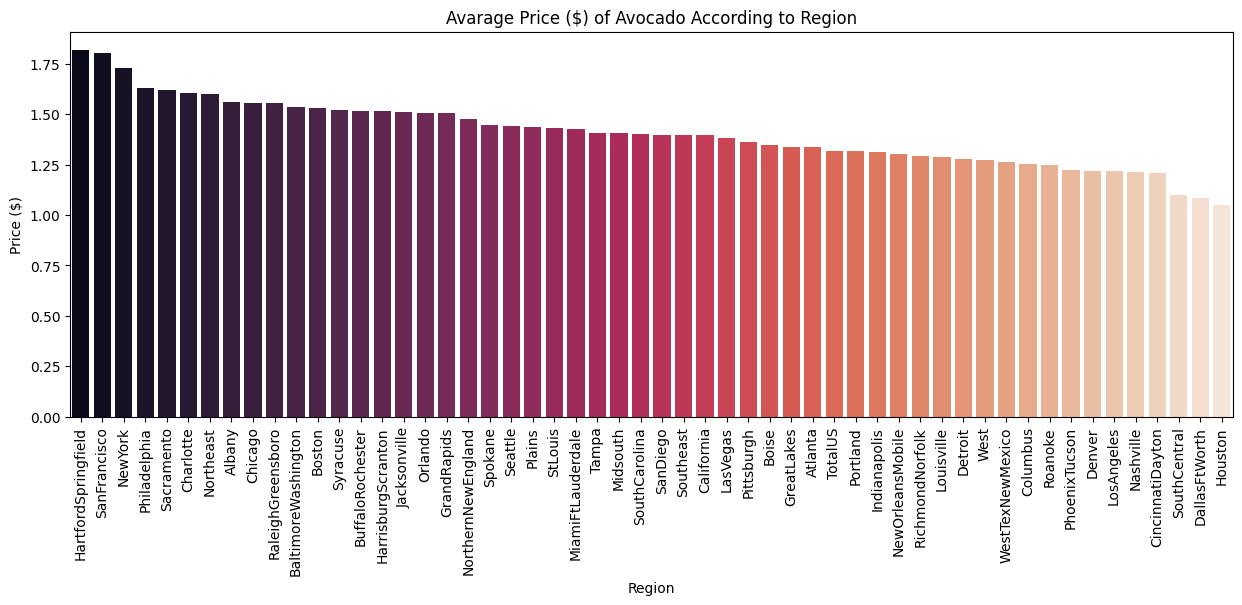

In [ ]:
### Which region are the lowest and highest prices of Avocado?
data1 = get_avarge_between_two_columns(df,'region','AveragePrice')
plot(data1,'Region','Price ($)')
plt.show()

In [ ]:
print(data1['column1'].iloc[-1], " is the region producing avocado with the lowest price.")

Houston  is the region producing avocado with the lowest price.


Text(0.5, 1.0, 'Figure: Boxplot repersenting outlier columns.')

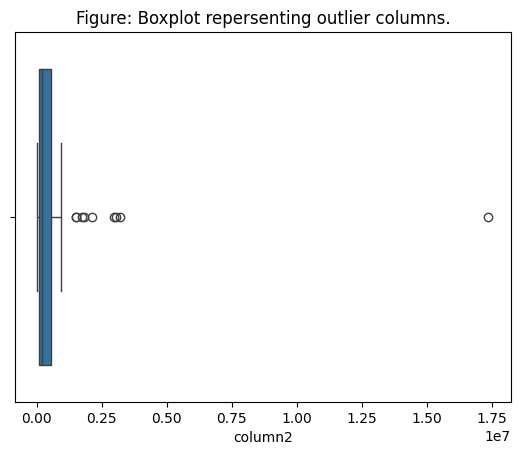

In [ ]:
### What is the highest region of avocado production?

data2 = get_avarge_between_two_columns(df,'region','Total Volume')
sns.boxplot(x=data2.column2).set_title("Figure: Boxplot repersenting outlier columns.")

In [ ]:
outlier_region = data2[data2.column2>10000000]
print(outlier_region['column1'].iloc[-1], "is outlier value")

TotalUS is outlier value


In [ ]:
outlier_region.index
data2 = data2.drop(outlier_region.index,axis=0)

<ipython-input-10-ea6189be2f73>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(x=data.column1,y=data.column2,palette='rocket')


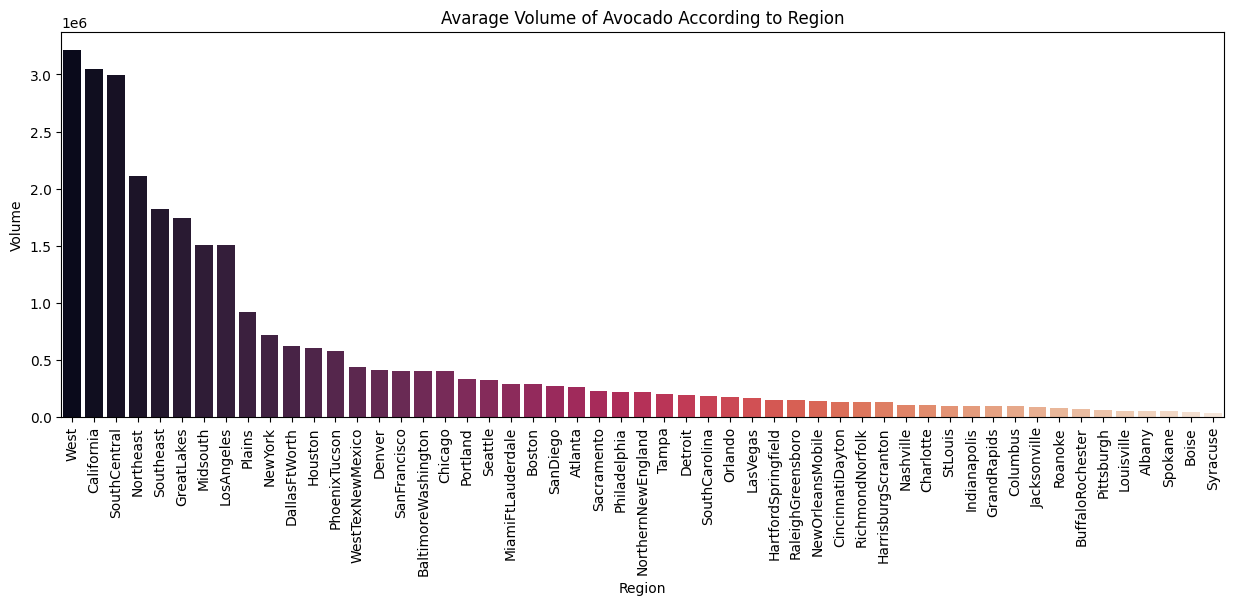

In [ ]:
plot(data2,'Region','Volume')

<ipython-input-10-ea6189be2f73>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(x=data.column1,y=data.column2,palette='rocket')


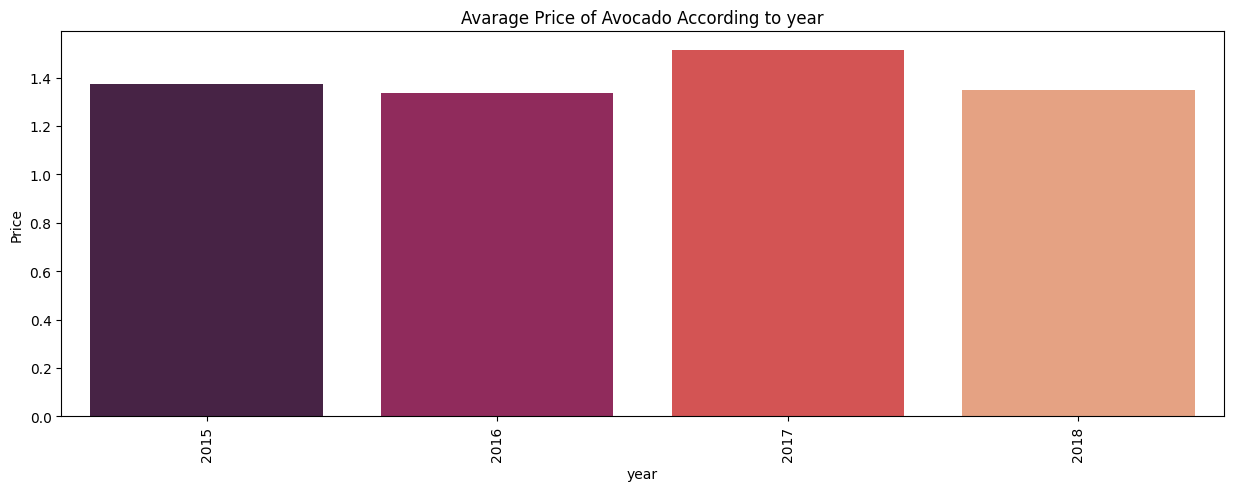

In [ ]:
### What is the average avocado prices in each year?

data3 = get_avarge_between_two_columns(df,'year','AveragePrice')
plot(data3,'year','Price')

<ipython-input-10-ea6189be2f73>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(x=data.column1,y=data.column2,palette='rocket')


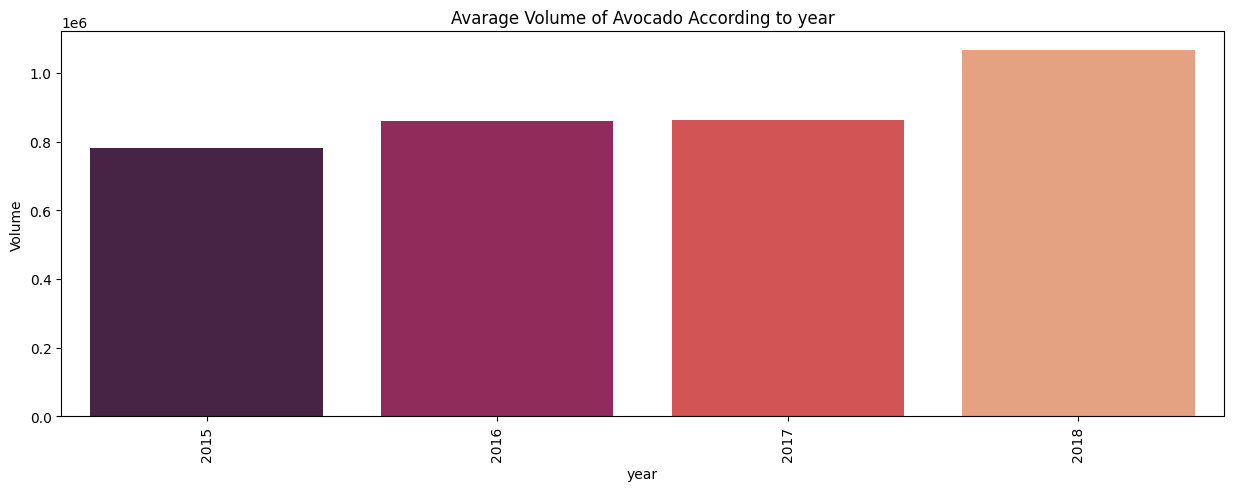

In [ ]:
### What is the average avocado volume in each year?

data4 = get_avarge_between_two_columns(df,'year','Total Volume')
plot(data4,'year','Volume')

## Data Modeling

In [ ]:
df['region'] = df['region'].astype('category')
df['region'] = df['region'].cat.codes

df['type'] = df['type'].astype('category')
df['type'] = df['type'].cat.codes

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  18249 non-null  float64
 1   Total Volume  18249 non-null  float64
 2   Total Bags    18249 non-null  float64
 3   Small Bags    18249 non-null  float64
 4   Large Bags    18249 non-null  float64
 5   XLarge Bags   18249 non-null  float64
 6   type          18249 non-null  int8   
 7   year          18249 non-null  int64  
 8   region        18249 non-null  int8   
dtypes: float64(6), int64(1), int8(2)
memory usage: 1.0 MB


In [ ]:
# split data into X and y
X = df.drop(['AveragePrice'],axis=1)
y = df['AveragePrice']

# split data into traing and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3,
                                                    random_state=15)

In [ ]:
print("training set:",X_train.shape,' - ',y_train.shape[0],' samples')
print("testing set:",X_test.shape,' - ',y_test.shape[0],' samples')

training set: (12774, 8)  -  12774  samples
testing set: (5475, 8)  -  5475  samples


In [ ]:
# bulid and fit the model
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [ ]:
# prediction and calculate the accuracy for the testing dataset
test_pre = model.predict(X_test)
test_score = r2_score(y_test,test_pre)
print("The accuracy of testing dataset ",test_score*100)

The accuracy of testing dataset  38.58074176450169


In [ ]:
# prediction and calculate the accuracy for the testing dataset
train_pre = model.predict(X_train)
train_score = r2_score(y_train,train_pre)
print("The accuracy of training dataset ",train_score*100)

The accuracy of training dataset  39.70686042411086


# Predicting the prices of Avacados

In [ ]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('avocado.csv')
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


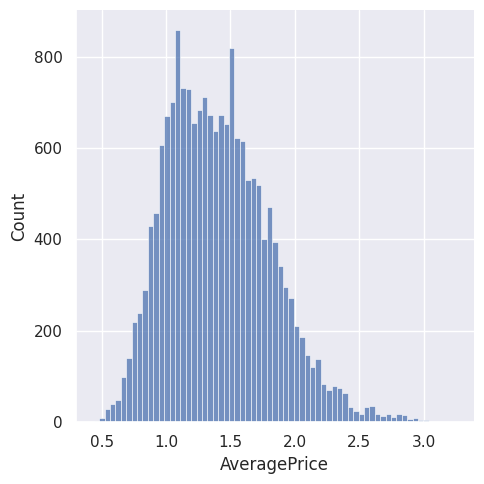

In [ ]:
sns.displot(df['AveragePrice'])

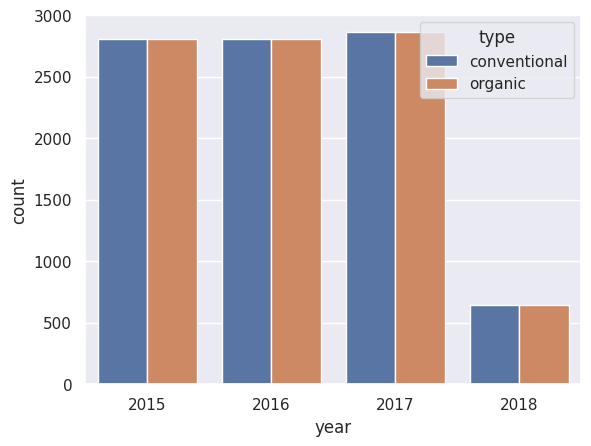

In [ ]:
sns.countplot(x='year',data=df,hue='type');

In [ ]:
df.year.value_counts()

,count
year,
2017,5722
2016,5616
2015,5615
2018,1296


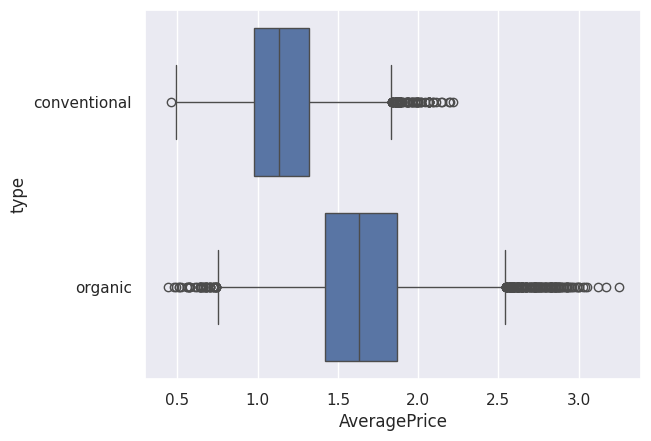

In [ ]:
sns.boxplot(y="type", x="AveragePrice", data=df);

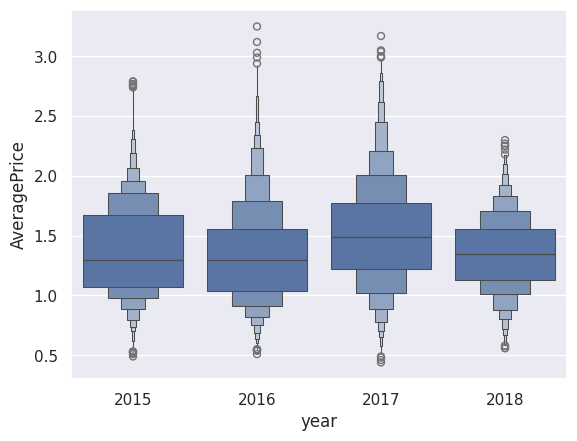

In [ ]:
df.year=df.year.apply(str)
sns.boxenplot(x="year", y="AveragePrice", data=df);

In [ ]:
df['type']= df['type'].map({'conventional':0,'organic':1})

# Extracting month from date column.
df.Date = df.Date.apply(pd.to_datetime)
df['Month']=df['Date'].apply(lambda x:x.month)
df.drop('Date',axis=1,inplace=True)
df.Month = df.Month.map({1:'JAN',2:'FEB',3:'MARCH',4:'APRIL',5:'MAY',6:'JUNE',7:'JULY',8:'AUG',9:'SEPT',10:'OCT',11:'NOV',12:'DEC'})

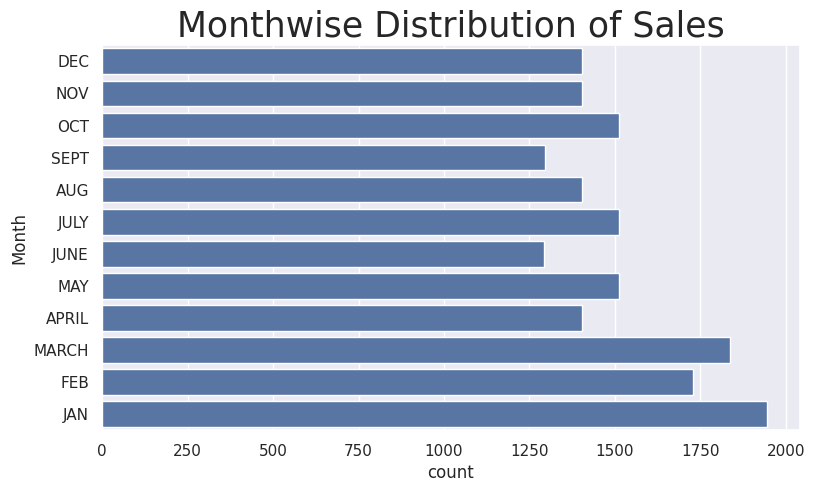

In [ ]:
plt.figure(figsize=(9,5))
sns.countplot(df['Month'])
plt.title('Monthwise Distribution of Sales',fontdict={'fontsize':25});

## Preaparing Data for ML Models

In [ ]:
# Creating dummy variables
dummies = pd.get_dummies(df[['year','region','Month']],drop_first=True)
df_dummies = pd.concat([df[['Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'type']],dummies],axis=1)
target = df['AveragePrice']

# Splitting data into training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_dummies,target,test_size=0.30)

# Standardizing the data
cols_to_std = ['Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags','Large Bags', 'XLarge Bags']
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train[cols_to_std])
X_train[cols_to_std] = scaler.transform(X_train[cols_to_std])
X_test[cols_to_std] = scaler.transform(X_test[cols_to_std])

In [ ]:
#importing ML models from scikit-learn
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [ ]:
#to save time all models can be applied once using for loop
regressors = {
    'Linear Regression' : LinearRegression(),
    'Decision Tree' : DecisionTreeRegressor(),
    'Random Forest' : RandomForestRegressor(),
    'Support Vector Machines' : SVR(gamma=1),
    'K-nearest Neighbors' : KNeighborsRegressor(n_neighbors=1),
    'XGBoost' : XGBRegressor()
}
results=pd.DataFrame(columns=['MAE','MSE','R2-score'])
for method,func in regressors.items():
    model = func.fit(X_train,y_train)
    pred = model.predict(X_test)
    results.loc[method]= [np.round(mean_absolute_error(y_test,pred),3),
                          np.round(mean_squared_error(y_test,pred),3),
                          np.round(r2_score(y_test,pred),3)
                         ]

## Deep Neural Network

In [ ]:
# Splitting train set into training and validation sets.
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train,test_size=0.20)


In [ ]:
# Convert all columns in X_train and X_val to numeric types
X_train = X_train.apply(pd.to_numeric, errors='coerce')
X_val = X_val.apply(pd.to_numeric, errors='coerce')

# Replace any NaN values that may have been introduced by the conversion
X_train = X_train.fillna(0)
X_val = X_val.fillna(0)

# Explicitly convert all columns to float32 dtype
X_train = X_train.astype(np.float32)
X_val = X_val.astype(np.float32)

In [ ]:
#importing tensorflow libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

#creating model
model = Sequential()
model.add(Dense(76,activation='relu',kernel_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1),
    bias_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1)))
model.add(Dense(200,activation='relu',kernel_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1),
    bias_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1)))
model.add(Dropout(0.5))
model.add(Dense(200,activation='relu',kernel_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1),
    bias_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1)))
model.add(Dropout(0.5))
model.add(Dense(200,activation='relu',kernel_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1),
    bias_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1)))
model.add(Dropout(0.5))
model.add(Dense(1))

model.compile(optimizer='Adam', loss='mean_squared_error')
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=0, patience=10)

In [ ]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Now, fit the model
model.fit(x=X_train.values, y=y_train.values,
          validation_data=(X_val.values, y_val.values),
          batch_size=100, epochs=150, callbacks=[early_stop])

Epoch 1/150
82/82 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.7069 - val_loss: 0.0946
Epoch 2/150
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1263 - val_loss: 0.0663
Epoch 3/150
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0979 - val_loss: 0.0667
Epoch 4/150
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0882 - val_loss: 0.0488
Epoch 5/150
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0793 - val_loss: 0.0444
Epoch 6/150
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0765 - val_loss: 0.0439
Epoch 7/150
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0681 - val_loss: 0.0383
Epoch 8/150
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0634 - val_loss: 0.0420
Epoch 9/150
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0596 - val_loss: 0.0359
Epoch 10/150
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0571 - val_loss: 0.0343
Epoch 11/150
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0550 - val_loss: 0.0342
Epoch 12/150
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.

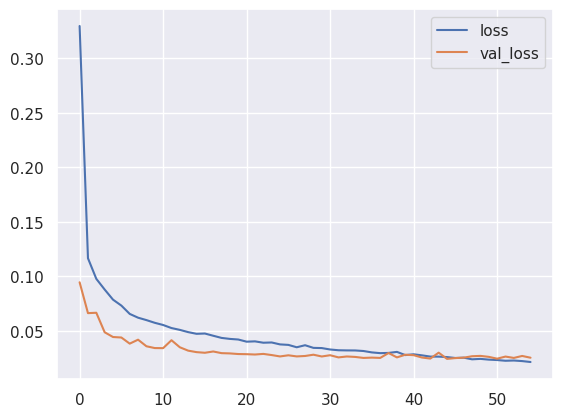

In [ ]:
losses = pd.DataFrame(model.history.history)
losses[['loss','val_loss']].plot();

In [ ]:
dnn_pred = model.predict(X_test)

172/172 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [ ]:
results.loc['Deep Neural Network']=[round(mean_absolute_error(y_test,dnn_pred),3),round(mean_squared_error(y_test,dnn_pred),3),
                                    round(r2_score(y_test,dnn_pred),3)]
results

,MAE,MSE,R2-score
Linear Regression,0.182,0.059,0.640
Decision Tree,0.131,0.040,0.756
Random Forest,0.096,0.019,0.886
Support Vector Machines,0.120,0.029,0.822
K-nearest Neighbors,0.100,0.025,0.849
XGBoost,0.093,0.016,0.900
Deep Neural Network,0.115,0.027,0.832


In [ ]:
f"10% of mean of target variable is {np.round(0.1 * df.AveragePrice.mean(),3)}"

'10% of mean of target variable is 0.141'

In [ ]:
results.sort_values('R2-score',ascending=False).style.background_gradient(cmap='Greens',subset=['R2-score'])

,MAE,MSE,R2-score
XGBoost,0.093000,0.016000,0.900000
Random Forest,0.096000,0.019000,0.886000
K-nearest Neighbors,0.100000,0.025000,0.849000
Deep Neural Network,0.115000,0.027000,0.832000
Support Vector Machines,0.120000,0.029000,0.822000
Decision Tree,0.131000,0.040000,0.756000
Linear Regression,0.182000,0.059000,0.640000
